In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 5s 0us/step


In [2]:
def preprocess_input(x,y):
    X = tf.keras.applications.inception_resnet_v2.preprocess_input(x)
    Y=tf.keras.utils.to_categorical(y)
    return X,Y

x_train , y_train = preprocess_input(x_train,y_train)
x_test, y_test = preprocess_input(x_test,y_test)

from tensorflow.keras.applications import InceptionResNetV2

base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

    

219055592/219055592 [==============================] - 1s 0us/step


In [3]:
inputs = tf.keras.Input(shape=(32, 32, 3))
input1 =tf.keras.layers.Lambda(lambda images: tf.image.resize(images, (299, 299)))(inputs)
x = base_model(input1, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, x)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 299, 299, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dropout (Dropout)           (None, 1024)              0     

In [5]:
base_model.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 lambda (Lambda)             (None, 299, 299, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 8, 8, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dropout (Dropout)           (None, 1024)              0     

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=300)

Epoch 1/10
167/167 [==============================] - 301s 2s/step - loss: 0.4163 - accuracy: 0.8640 - val_loss: 0.3111 - val_accuracy: 0.8970
Epoch 2/10
167/167 [==============================] - 262s 2s/step - loss: 0.2973 - accuracy: 0.9009 - val_loss: 0.2885 - val_accuracy: 0.9028
Epoch 3/10
167/167 [==============================] - 262s 2s/step - loss: 0.2692 - accuracy: 0.9099 - val_loss: 0.2611 - val_accuracy: 0.9128
Epoch 4/10
167/167 [==============================] - 262s 2s/step - loss: 0.2510 - accuracy: 0.9154 - val_loss: 0.2618 - val_accuracy: 0.9165
Epoch 5/10
167/167 [==============================] - 262s 2s/step - loss: 0.2365 - accuracy: 0.9208 - val_loss: 0.2595 - val_accuracy: 0.9135
Epoch 6/10
167/167 [==============================] - 262s 2s/step - loss: 0.2222 - accuracy: 0.9237 - val_loss: 0.2524 - val_accuracy: 0.9174
Epoch 7/10
167/167 [==============================] - 261s 2s/step - loss: 0.2130 - accuracy: 0.9276 - val_loss: 0.2575 - val_accuracy: 0.9143

313/313 [==============================] - 52s 165ms/step - loss: 0.2574 - accuracy: 0.9181
Test accuracy: 91.81%


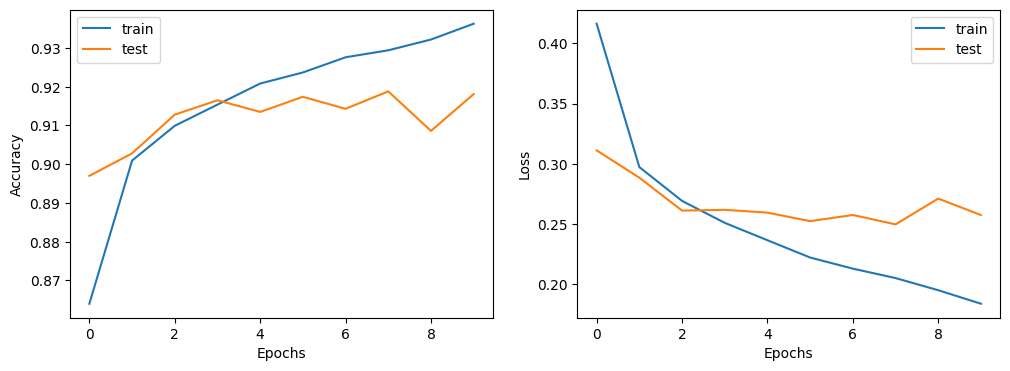

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# Evaluate the model
test_loss, test_acc= model.evaluate(x_test, y_test)
print("Test accuracy: {:.2f}%".format(test_acc * 100))

# Visualize the training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save the model
base_model.save('models/transfer_learning_model.h5')